# Inverse indexing, index search¶

##  Get Ready the documents/webpages

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')




In [2]:
print('---- > Load libs')

---- > Load libs


In [3]:
# Load libs

import pandas as pd
import numpy as np 
import string
import random

import nltk

from nltk.corpus import reuters

from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
import pandas as pd


In [4]:
print('---- > check DataSet elements number')

---- > check DataSet elements number


In [5]:
#check Length DataSet Fieled
len(reuters.fileids())

232

In [6]:
#check Type DS
print(type(reuters.fileids()[:10]))

<class 'list'>


In [7]:
print('---- > Trying see first element')

---- > Trying see first element


In [8]:
#view text from one document 
reuters.raw(fileids=['test/1'])[0:89]

'Cafe caen\n  https://www.pagesjaunes.fr/pros/detail?bloc_id=0231866364071615730001C0001\n" '

In [9]:
print('---- > remove punctuation')

---- > remove punctuation


In [10]:
# remove punctuation from all DOCs 
exclude = set(string.punctuation)
exclude = [";","!","\\",",","#","@","$","&",",","``","''",")","(","\""]
alldocslist = []
#print(reuters)
for index, i in  enumerate(reuters.fileids()):
    text = reuters.raw(fileids=[i])
    text = ''.join(ch for ch in text if ch not in exclude)
    alldocslist.append(text)
    
print(alldocslist[1])

Cafe caen
  https://www.pagesjaunes.fr/pros/detail?bloc_id=0231866364071615730001C0001
  Niche dans les jardins de la cour intĂŠrieure du chateau de Caen et communicant avec le Musee des Beaux Arts notre restaurant avec terrasse vous fait partager des soirees musicales  Vous dĂŠgusterez une cuisine actuelle et gastronomique Les suggestions du chef sont  la cocotte de SaintJacques  endives et emulsion de mandarines a 1050 Euro le croquant de caille avec salade champignons et son jus aux airelles a 12 Euro et la terrine de foie gras de canard a 14 Euro En plat retrouvez notre spĂŠcialitĂŠ  la tripe de Caen   Retrouveznous sur notre site internet et notre page Facebook 



In [11]:
print('---- > tokenize words')

---- > tokenize words


In [12]:
#tokenize words in all DOCS 
plot_data = [[]] * len(alldocslist)

for doc in alldocslist:
    text = doc
    tokentext = word_tokenize(text)
    plot_data[index].append(tokentext)
    
print(plot_data[0][1])

['Cafe', 'caen', 'https', ':', '//www.pagesjaunes.fr/pros/detail', '?', 'bloc_id=0231866364071615730001C0001', 'Niche', 'dans', 'les', 'jardins', 'de', 'la', 'cour', 'intĂŠrieure', 'du', 'chateau', 'de', 'Caen', 'et', 'communicant', 'avec', 'le', 'Musee', 'des', 'Beaux', 'Arts', 'notre', 'restaurant', 'avec', 'terrasse', 'vous', 'fait', 'partager', 'des', 'soirees', 'musicales', 'Vous', 'dĂŠgusterez', 'une', 'cuisine', 'actuelle', 'et', 'gastronomique', 'Les', 'suggestions', 'du', 'chef', 'sont', 'la', 'cocotte', 'de', 'SaintJacques', 'endives', 'et', 'emulsion', 'de', 'mandarines', 'a', '1050', 'Euro', 'le', 'croquant', 'de', 'caille', 'avec', 'salade', 'champignons', 'et', 'son', 'jus', 'aux', 'airelles', 'a', '12', 'Euro', 'et', 'la', 'terrine', 'de', 'foie', 'gras', 'de', 'canard', 'a', '14', 'Euro', 'En', 'plat', 'retrouvez', 'notre', 'spĂŠcialitĂŠ', 'la', 'tripe', 'de', 'Caen', 'Retrouveznous', 'sur', 'notre', 'site', 'internet', 'et', 'notre', 'page', 'Facebook']


In [13]:
print('[0][1][2]')

[0][1][2]


In [14]:
# Navigation: first index gives all documents, second index gives specific document, third index gives words of that doc
plot_data[0][1][2]

'https'

In [15]:
print('---- > all words lower')

---- > all words lower


In [16]:

#make all words lower case for all docs 
for x in range(len(reuters.fileids())):
    lowers = [word.lower() for word in plot_data[0][x]]
    plot_data[0][x] = lowers

plot_data[0][1][0:30]

['cafe',
 'caen',
 'https',
 ':',
 '//www.pagesjaunes.fr/pros/detail',
 '?',
 'bloc_id=0231866364071615730001c0001',
 'niche',
 'dans',
 'les',
 'jardins',
 'de',
 'la',
 'cour',
 'intăšrieure',
 'du',
 'chateau',
 'de',
 'caen',
 'et',
 'communicant',
 'avec',
 'le',
 'musee',
 'des',
 'beaux',
 'arts',
 'notre',
 'restaurant',
 'avec']

In [17]:
print('---- > stop words from all docs French')

---- > stop words from all docs French


In [18]:
# remove stop words from all docs 
stop_words = set(stopwords.words('french'))

for x in range(len(reuters.fileids())):
    filtered_sentence = [w for w in plot_data[0][x] if not w in stop_words]
    plot_data[0][x] = filtered_sentence

plot_data[0][1][0:100]

['cafe',
 'caen',
 'https',
 ':',
 '//www.pagesjaunes.fr/pros/detail',
 '?',
 'bloc_id=0231866364071615730001c0001',
 'niche',
 'jardins',
 'cour',
 'intăšrieure',
 'chateau',
 'caen',
 'communicant',
 'musee',
 'beaux',
 'arts',
 'restaurant',
 'terrasse',
 'fait',
 'partager',
 'soirees',
 'musicales',
 'dăšgusterez',
 'cuisine',
 'actuelle',
 'gastronomique',
 'suggestions',
 'chef',
 'cocotte',
 'saintjacques',
 'endives',
 'emulsion',
 'mandarines',
 'a',
 '1050',
 'euro',
 'croquant',
 'caille',
 'salade',
 'champignons',
 'jus',
 'airelles',
 'a',
 '12',
 'euro',
 'terrine',
 'foie',
 'gras',
 'canard',
 'a',
 '14',
 'euro',
 'plat',
 'retrouvez',
 'spăšcialităš',
 'tripe',
 'caen',
 'retrouveznous',
 'site',
 'internet',
 'page',
 'facebook']

In [19]:
print('---- > stemmed_sentence,words')

---- > stemmed_sentence,words


In [20]:
#stem words EXAMPLE (could try others/lemmers )

snowball_stemmer = SnowballStemmer("french")
stemmed_sentence = [snowball_stemmer.stem(w) for w in filtered_sentence]
stemmed_sentence[0:10]

porter_stemmer = PorterStemmer()
snowball_stemmer = SnowballStemmer("french")
stemmed_sentence = [ porter_stemmer.stem(w) for w in filtered_sentence]
stemmed_sentence[0:20]

['pancak',
 'night',
 'fever',
 'http',
 ':',
 '//www.pagesjaunes.fr/pros/detail',
 '?',
 'bloc_id=023180708255703339h001c0001',
 '[',
 ']']

#  CREATING THE INVERSE-INDEX

In [21]:
print('---- > inverse index gives document number for each document and where word appears i need create a list of all words ')

---- > inverse index gives document number for each document and where word appears i need create a list of all words 


In [22]:
# Create inverse index which gives document number for each document and where word appears

#first we need to create a list of all words 
l = plot_data[0]
flatten = [item for sublist in l for item in sublist]
words = flatten
wordsunique = set(words)
wordsunique = list(wordsunique)


In [23]:
print('---- > TF - n_containing-tfidf-idf Word <---> doclist')

---- > TF - n_containing-tfidf-idf Word <---> doclist


In [24]:
# create functions for TD-IDF / BM25
import math


def tf(word, doc):
    return doc.count(word) / len(doc)

def n_containing(word, doclist):
    return sum(1 for doc in doclist if word in doc)

def idf(word, doclist):
    return math.log(len(doclist) / (0.01 + n_containing(word, doclist)))

def tfidf(word, doc, doclist):
    return (tf(word, doc) * idf(word, doclist))

In [25]:
print('---- > Create dictonary of words Take time to generate the "worddic_1000.npy"')

---- > Create dictonary of words Take time to generate the "worddic_1000.npy"


In [26]:
# Create dictonary of words
# THIS ONE-TIME INDEXING IS THE MOST PROCESSOR-INTENSIVE STEP AND WILL TAKE TIME TO RUN (BUT ONLY NEEDS TO BE RUN ONCE)
import re
import numpy as np

plottest = plot_data[0][0:1000]


worddic = {}

for doc in plottest:
    for word in wordsunique:
        if word in doc:
            word = (word)
            index = plottest.index(doc)
            positions = list(np.where(np.array(plottest[index]) == word)[0])
            idfs = tfidf(word,doc,plottest)
            try:
                worddic[word].append([index,positions,idfs])
            except:
                worddic[word] = []
                worddic[word].append([index,positions,idfs])
   # print('ended')

In [27]:
print('---- > here a Dic for "cafe"as KEY : List doc indexs - word positions - td-idf score')

---- > here a Dic for "cafe"as KEY : List doc indexs - word positions - td-idf score


In [28]:
# the index creates a dic with each word as a KEY and a list of doc indexs, word positions, and td-idf score as VALUES
worddic['cafe']

[[1, [0], 0.04455501605265705],
 [9, [0], 0.04455501605265705],
 [11, [0], 0.05728502063913049],
 [15, [0], 0.09356553371057981],
 [11, [0], 0.05728502063913049],
 [35, [0], 0.31188511236859934],
 [15, [0], 0.09356553371057981],
 [53, [0], 0.31188511236859934],
 [112, [3], 0.11227864045269577],
 [116, [0], 0.31188511236859934],
 [118, [0], 0.31188511236859934],
 [53, [0], 0.31188511236859934],
 [35, [0], 0.31188511236859934],
 [170, [35, 62], 0.0891100321053141]]

In [29]:
# pickel (save) the dictonary to avoid re-calculating
np.save('worddic_1000.npy', worddic)

#  The Search Engine

In [30]:
# create word search which takes multiple words and finds documents that contain both along with metrics for ranking:

    ## (1) Number of occruances of search words 
    ## (2) TD-IDF score for search words 
    ## (3) Percentage of search terms
    ## (4) Word ordering score 
    ## (5) Exact match bonus 

In [31]:
# create word search which takes multiple words and finds documents that contain both along with metrics for ranking:

    ## (1) Number of occruances of search words 
    ## (2) TD-IDF score for search words 
    ## (3) Percentage of search terms
    ## (4) Word ordering score 
    ## (5) Exact match bonus 


from collections import Counter

def search(searchsentence):
    try:
        # split sentence into individual words 
        searchsentence = searchsentence.lower()
        try:
            words = searchsentence.split(' ')
        except:
            words = list(words)
        enddic = {}
        idfdic = {}
        closedic = {}
        
        # remove words if not in worddic 
        realwords = []
        for word in words:
            if word in list(worddic.keys()):
                realwords.append(word)  
        words = realwords
       
        numwords = len(words)
        
        # make metric of number of occurances of all words in each doc & largest total IDF 
        for word in words:
            for indpos in worddic[word]:
                index = indpos[0]
                amount = len(indpos[1])
                idfscore = indpos[2]
                enddic[index] = amount
                idfdic[index] = idfscore
                fullcount_order = sorted(enddic.items(), key=lambda x:x[1], reverse=True)
                fullidf_order = sorted(idfdic.items(), key=lambda x:x[1], reverse=True)

                
                
        # make metric of what percentage of words appear in each doc
        combo = []
        alloptions = {k: worddic.get(k, None) for k in (words)}
        for worddex in list(alloptions.values()):
            for indexpos in worddex:
                for indexz in indexpos:
                    combo.append(indexz)
        comboindex = combo[::3]
        combocount = Counter(comboindex)
        for key in combocount:
            combocount[key] = combocount[key] / numwords
        combocount_order = sorted(combocount.items(), key=lambda x:x[1], reverse=True)
       
        
        # make metric for if words appear in same order as in search
        if len(words) > 1:
            x = []
            y = []
            for record in [worddic[z] for z in words]:
                for index in record:
                     x.append(index[0])
            for i in x:
                if x.count(i) > 1:
                    y.append(i)
            y = list(set(y))

            closedic = {}
            for wordbig in [worddic[x] for x in words]:
                for record in wordbig:
                    if record[0] in y:
                        index = record[0]
                        positions = record[1]
                        try:
                            closedic[index].append(positions)
                        except:
                            closedic[index] = []
                            closedic[index].append(positions)

            x = 0
            fdic = {}
            for index in y:
                csum = []
                for seqlist in closedic[index]:
                    while x > 0:
                        secondlist = seqlist
                        x = 0
                        sol = [1 for i in firstlist if i + 1 in secondlist]
                        csum.append(sol)
                        fsum = [item for sublist in csum for item in sublist]
                        fsum = sum(fsum)
                        fdic[index] = fsum
                        fdic_order = sorted(fdic.items(), key=lambda x:x[1], reverse=True)
                    while x == 0:
                        firstlist = seqlist
                        x = x + 1
        else:
            fdic_order = 0
                    
        # also the one above should be given a big boost if ALL found together 
           
        
        #could make another metric for if they are not next to each other but still close 
        
        
        return(searchsentence,words,fullcount_order,combocount_order,fullidf_order,fdic_order)
    
    except:
        return("")


search('china daily says what')
result2 = search('indonesia crude palm oil')
result3 = search('price of nickel')
result4 = search('north yemen sugar')
result5 = search('nippon steel')
result6 = search('China')
result7 = search('Gold')
result8 = search('trade')

In [32]:
print('---- > return will give back the search term for *niche jardins cafe Mancel* in 1-12 docs ')

---- > return will give back the search term for *niche jardins cafe Mancel* in 1-12 docs 


In [33]:
# 0 return will give back the search term, the rest will give back metrics (see above)

search('niche jardins cafe Mancel')[1][1:12]

['jardins', 'cafe', 'mancel']

In [34]:
print('---- > return will give back the search term for *niche jardins cafe Mancel* in all docs ')

---- > return will give back the search term for *niche jardins cafe Mancel* in all docs 


In [35]:
# 0 return will give back the search term, the rest will give back metrics (see above)

search('niche jardins cafe Mancel')[1]

['niche', 'jardins', 'cafe', 'mancel']

In [36]:
print('---- > the search term for *niche jardins cafe Mancel* in all docs with position in dataset ')

---- > the search term for *niche jardins cafe Mancel* in all docs with position in dataset 


In [37]:
search('niche jardins cafe Mancel')

('niche jardins cafe mancel',
 ['niche', 'jardins', 'cafe', 'mancel'],
 [(170, 2),
  (1, 1),
  (9, 1),
  (11, 1),
  (15, 1),
  (35, 1),
  (53, 1),
  (112, 1),
  (116, 1),
  (118, 1)],
 [(9, 1.0),
  (1, 0.75),
  (11, 0.5),
  (15, 0.5),
  (35, 0.5),
  (53, 0.5),
  (112, 0.25),
  (116, 0.25),
  (118, 0.25),
  (170, 0.25)],
 [(35, 0.31188511236859934),
  (53, 0.31188511236859934),
  (116, 0.31188511236859934),
  (118, 0.31188511236859934),
  (112, 0.11227864045269577),
  (15, 0.09356553371057981),
  (170, 0.0891100321053141),
  (9, 0.086298206997034),
  (11, 0.05728502063913049),
  (1, 0.04455501605265705)],
 [(9, 2), (1, 1), (35, 0), (11, 0), (15, 0), (53, 0)])

In [38]:
# save metrics to dataframe for use in ranking 
result1 = search('caen petit cafe Mancel')
result2 = search('niche ville cafe Mancel')
result3 = search('niche jardins')
result4 = search('park Mancel')
result5 = search('jardins')
result6 = search('restaurant')
result7 = search('cafe')
result8 = search('idc')
df = pd.DataFrame([result1,result2,result3,result4,result5,result6,result7,result8])
df.columns = ['search term', 'actual_words_searched','num_occur','percentage_of_terms','td-idf','word_order']
df

,search term,actual_words_searched,num_occur,percentage_of_terms,td-idf,word_order
0,caen petit cafe mancel,"[caen, cafe, mancel]","[(14, 2), (170, 2), (1, 1), (6, 1), (7, 1), (9...","[(11, 1.3333333333333333), (15, 1.333333333333...","[(35, 0.31188511236859934), (53, 0.31188511236...","[(35, 1), (9, 1), (1, 0), (6, 0), (7, 0), (11,..."
1,niche ville cafe mancel,"[niche, cafe, mancel]","[(170, 2), (1, 1), (9, 1), (11, 1), (15, 1), (...","[(9, 1.0), (1, 0.6666666666666666), (11, 0.666...","[(35, 0.31188511236859934), (53, 0.31188511236...","[(9, 1), (1, 0), (35, 0), (11, 0), (15, 0), (5..."
2,niche jardins,"[niche, jardins]","[(1, 1), (9, 1)]","[(1, 1.0), (9, 1.0)]","[(1, 0.07537464523167184), (9, 0.0753746452316...","[(1, 1), (9, 1)]"
3,park mancel,[mancel],"[(9, 1)]","[(9, 1.0)]","[(9, 0.086298206997034)]",0
4,jardins,[jardins],"[(1, 1), (9, 1)]","[(1, 1.0), (9, 1.0)]","[(1, 0.07537464523167184), (9, 0.0753746452316...",0
5,restaurant,[restaurant],"[(181, 2), (207, 2), (1, 1), (6, 1), (7, 1), (...","[(6, 2.0), (7, 2.0), (8, 2.0), (11, 2.0), (14,...","[(194, 0.21334253029413397), (209, 0.213342530...",0
6,cafe,[cafe],"[(170, 2), (1, 1), (9, 1), (11, 1), (15, 1), (...","[(11, 2.0), (15, 2.0), (35, 2.0), (53, 2.0), (...","[(35, 0.31188511236859934), (53, 0.31188511236...",0
7,None,None,None,None,None,None


In [39]:
print('---- > return a doc list number 1 as exemple here alldocslist[1]')

---- > return a doc list number 1 as exemple here alldocslist[1]


In [40]:
# look to see if the top documents seem to make sense

alldocslist[1]

'Cafe caen\n  https://www.pagesjaunes.fr/pros/detail?bloc_id=0231866364071615730001C0001\n  Niche dans les jardins de la cour intĂŠrieure du chateau de Caen et communicant avec le Musee des Beaux Arts notre restaurant avec terrasse vous fait partager des soirees musicales  Vous dĂŠgusterez une cuisine actuelle et gastronomique Les suggestions du chef sont  la cocotte de SaintJacques  endives et emulsion de mandarines a 1050 Euro le croquant de caille avec salade champignons et son jus aux airelles a 12 Euro et la terrine de foie gras de canard a 14 Euro En plat retrouvez notre spĂŠcialitĂŠ  la tripe de Caen   Retrouveznous sur notre site internet et notre page Facebook \n'

#  Rank and return 

In [41]:
print('---- > create a Rank With Same Rules :   ')

---- > create a Rank With Same Rules :   


In [42]:
print('---- > rule1: if high word order score & 100% percentage terms then put at top position')

---- > rule1: if high word order score & 100% percentage terms then put at top position


In [43]:
print('---- > rule2: next add other word order score which are greater than 1 ')

---- > rule2: next add other word order score which are greater than 1 


In [44]:
print('---- > rule3: next add top td-idf results')

---- > rule3: next add top td-idf results


In [45]:
print('---- > rule4: next add other high percentage score')

---- > rule4: next add other high percentage score


In [46]:
print('---- > rule5: next add any other top results for metrics')

---- > rule5: next add any other top results for metrics


In [47]:
# create a simple (non-machine learning) rank and return function

def rank(term):
    results = search(term)

    # get metrics 
    num_score = results[2]
    per_score = results[3]
    tfscore = results[4]
    order_score = results[5]
    
    
    final_candidates = []

    # rule1: if high word order score & 100% percentage terms then put at top position
    try:
        first_candidates = []

        for candidates in order_score:
            if candidates[1] > 1:
                first_candidates.append(candidates[0])

        second_candidates = []

        for match_candidates in per_score:
            if match_candidates[1] == 1:
                second_candidates.append(match_candidates[0])
            if match_candidates[1] == 1 and match_candidates[0] in first_candidates:
                final_candidates.append(match_candidates[0])

    # rule2: next add other word order score which are greater than 1 

        t3_order = first_candidates[0:3]
        for each in t3_order:
            if each not in final_candidates:
                final_candidates.insert(len(final_candidates),each)

    # rule3: next add top td-idf results
        final_candidates.insert(len(final_candidates),tfscore[0][0])
        final_candidates.insert(len(final_candidates),tfscore[1][0])

    # rule4: next add other high percentage score 
        t3_per = second_candidates[0:3]
        for each in t3_per:
            if each not in final_candidates:
                final_candidates.insert(len(final_candidates),each)

    #rule5: next add any other top results for metrics
        othertops = [num_score[0][0],per_score[0][0],tfscore[0][0],order_score[0][0]]
        for top in othertops:
            if top not in final_candidates:
                final_candidates.insert(len(final_candidates),top)
                
    # unless single term searched, in which case just return 
    except:
        othertops = [num_score[0][0],num_score[1][0],num_score[2][0],per_score[0][0],tfscore[0][0]]
        for top in othertops:
            if top not in final_candidates:
                final_candidates.insert(len(final_candidates),top)

    for index, results in enumerate(final_candidates):
        if index < 5:
            print("RESULT", index + 1, ":", alldocslist[results][0:100],"...")

In [48]:
print('---- > rank as Exemple - search :cafe caen')

---- > rank as Exemple - search :cafe caen


In [49]:
# example of output 
rank('cafe caen')

RESULT 1 : Cafe Mango
  https://www.pagesjaunes.fr/pros/detail?bloc_id=07940672700001C0001
  []
 ...
RESULT 2 : Cafe Latin
  https://www.pagesjaunes.fr/pros/detail?bloc_id=023185263600000000C0001
  []
 ...
RESULT 3 : Cafe caen
  https://www.pagesjaunes.fr/pros/detail?bloc_id=0231866364071615730001C0001
  Niche dans  ...
RESULT 4 : Cafe Mancel
  https://www.pagesjaunes.fr/pros/detail?bloc_id=0231866364071615730001C0001
  Niche dan ...
RESULT 5 : Cafe de Caen
  https://www.pagesjaunes.fr/pros/detail?bloc_id=00332394000002C0001
  Venez decouvrir  ...


In [50]:
print('---- > rank as Exemple - search :restaurant')

---- > rank as Exemple - search :restaurant


In [51]:
# example of output 
rank('restaurant')

RESULT 1 : Au Siecle or
  https://www.pagesjaunes.fr/pros/detail?bloc_id=0231858989559689650001C0001
  Restaura ...
RESULT 2 : Gibus Restaurant
  https://www.pagesjaunes.fr/pros/detail?bloc_id=51352137000001C0001
  Dans un cadr ...
RESULT 3 : Cafe caen
  https://www.pagesjaunes.fr/pros/detail?bloc_id=0231866364071615730001C0001
  Niche dans  ...
RESULT 4 : L'Oriental Couscous
  https://www.pagesjaunes.fr/pros/detail?bloc_id=0231343536086288620002C0001
  N ...
RESULT 5 : Restaurant Woumayi
  https://www.pagesjaunes.fr/pros/detail?bloc_id=023123253800000000C0001
  []
 ...


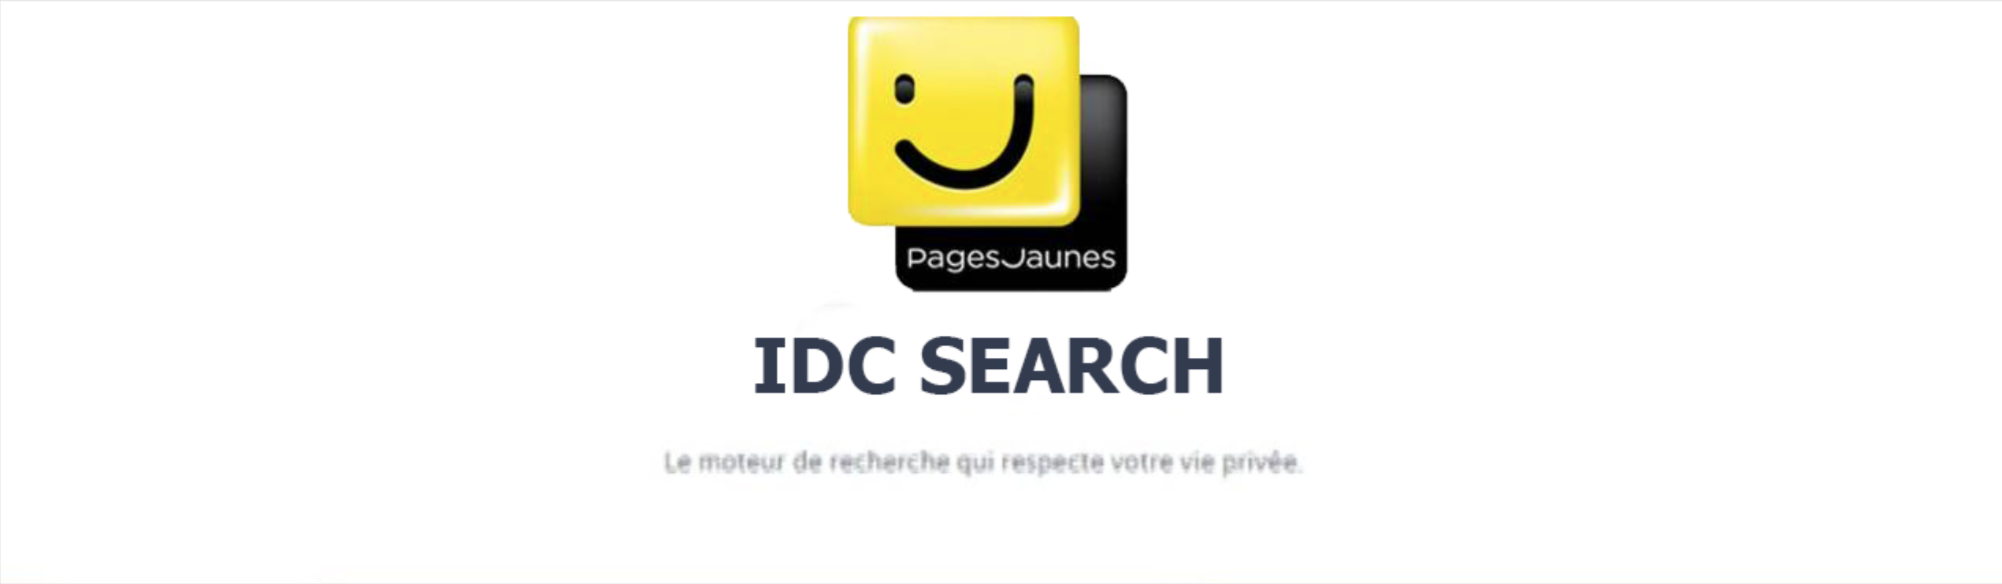

In [52]:
from IPython.display import Image
Image(filename='logo.png')

<h1><center>Hello, What Are You Looking For !</center></h1>


In [62]:

term = input("search: ")
try:
    result = rank(term).center(50)
    result
    feedback = input("were these articles helpful?, (Y/N): ")
    if feedback == "Y":
        np.save('correct_search.npy', worddic) 
    elif feedback == "exit":
            print("sorry it was not helpful, try again")
        
except:
    print("no results found")

search: restaurant burger
RESULT 1 : L'atelier Du Burger
  https://www.pagesjaunes.fr/pros/detail?bloc_id=023139550355828204H001C0001
  [ ...
RESULT 2 : Restaurant Woumayi
  https://www.pagesjaunes.fr/pros/detail?bloc_id=023123253800000000C0001
  []
 ...
RESULT 3 : L'Oriental Couscous
  https://www.pagesjaunes.fr/pros/detail?bloc_id=0231343536086288620002C0001
  N ...
RESULT 4 : McDonals Caen Cote De Nacre
  https://www.pagesjaunes.fr/pros/detail?bloc_id=0231942525069252490001C ...
RESULT 5 : Aux Casseroles qui chantent
  https://www.pagesjaunes.fr/pros/detail?bloc_id=0231721894541860210001C ...
no results found


 Kamal MAHFOUDI & Omaima AJJAJI - IDC - 2019/2020